# Task 2
## Team 15
- Ahmed Hossam Sedky
- Ahmed Mohamed Abdelfattah
- Ehab Wahba Abdelrahman
- Mo'men Maged Mohamed
- Mohaned Alaa Ragab

**Import numpy and the required image processing functions**

*Note: cv2 is only imported to open the image and get its dimensions*

In [1]:
# from libs import normalization, equalization, filters, noise, graphs, edge_detection, threshold
from libs import filters, edge_detection ,hough,activeContour
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

**Open the image**

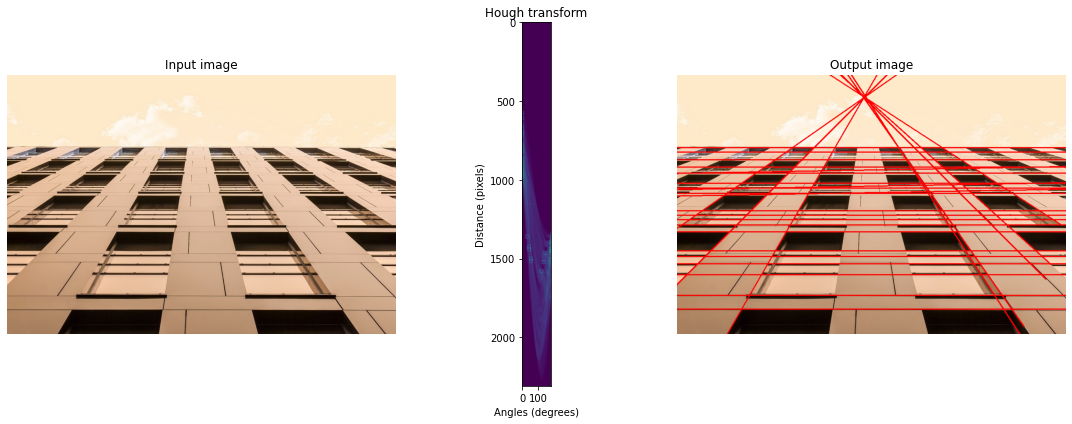

In [3]:
img = cv2.imread("images/building2.jpg")

copImg = np.copy(img)

houghSpace, thetas, rhos = hough.houghLine(img)

numPeaks = 30
indicies, HoughSpace = hough.hough_peaks(houghSpace, numPeaks, nhood_size=20)  
hough.hough_lines_draw(img, indicies, rhos, thetas)

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(copImg)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(HoughSpace)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(img)
ax[2].set_title('Output image')
ax[2].set_axis_off()


plt.tight_layout()
plt.show()

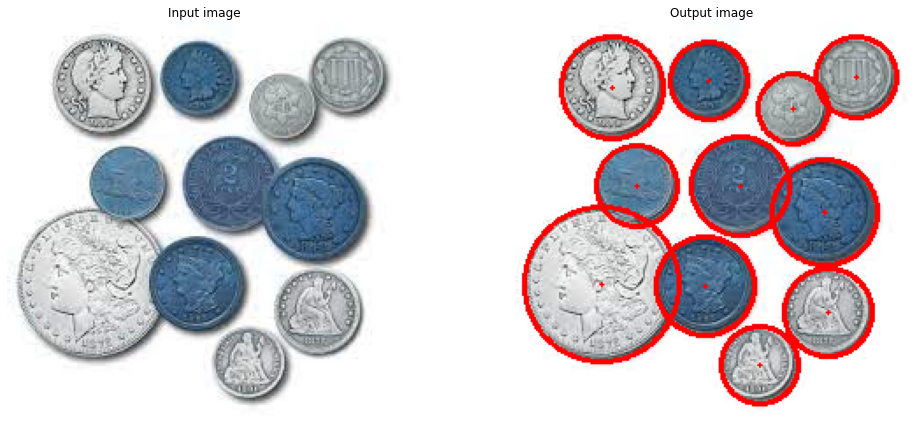

In [3]:
img = cv2.imread("images/coins1.jpg")
copImg =np.copy(img)

min_radius = 2
max_radius = 45
circles  = hough.houghCircle(img, threshold=10, region=15, radius=[max_radius, min_radius]) #threshold = 10,15 
hough.hough_circle_draw(circles , img)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(copImg)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(img)
ax[1].set_title('Output image')
ax[1].set_axis_off()


plt.tight_layout()
plt.show()


area =  22482.5
perimeter =  144


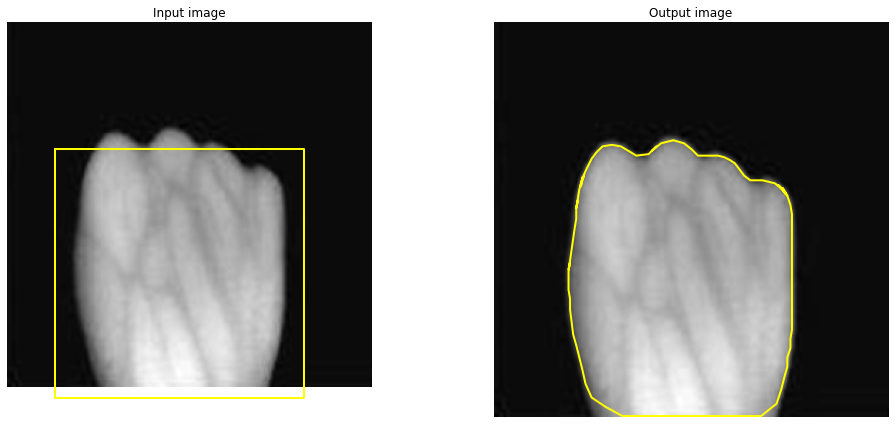

In [2]:
# Parameters For hand.png image
alpha = 20  
beta = 0.01  
gamma = 2  
w_line = 1  
w_edge = 8 

num_xpoints = 180
num_ypoints = 180
num_iterations = 100

img = cv2.imread("images/hand.png",0)
image_src = np.copy(img)

contour_x, contour_y, WindowCoordinates = activeContour.create_square_contour(source=image_src,
                                                                num_xpoints=num_xpoints, num_ypoints=num_ypoints,x_position= 95, y_position=40)

ExternalEnergy = gamma * activeContour.calculate_external_energy(image_src, w_line, w_edge)
cont_x, cont_y = np.copy(contour_x), np.copy(contour_y)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
ax = axes.ravel()
ax[0].set_title('Input image')
ax[0].imshow(img, cmap='gray')
ax[0].plot(np.r_[cont_x, cont_x[0]],
        np.r_[cont_y, cont_y[0]], c=(1, 1, 0), lw=2)
ax[0].set_axis_off()

for iteration in range(num_iterations):
    cont_x, cont_y = activeContour.iterate_contour(source=image_src, contour_x=cont_x, contour_y=cont_y,
                                        external_energy=ExternalEnergy, window_coordinates=WindowCoordinates,
                                        alpha=alpha, beta=beta)
#     result = []
    # for j in range(len(cont_x)):
    #     result = cv2.circle(image_src,(int(cont_x[j]),int(cont_y[j])),3,[255,255,0],-1)
    # cv2.imwrite("result" + str(iteration) + ".jpg",result)

area =  activeContour.calculateAreaPerimeter(contour_x=cont_x, contour_y=cont_y)
perimeter = len(cont_x) 

print ("area = " ,area)
print ("perimeter = " ,perimeter)
ax[1].set_title('Output image')
ax[1].imshow(img, cmap='gray')
ax[1].plot(np.r_[cont_x, cont_x[0]],
        np.r_[cont_y, cont_y[0]], c=(1, 1, 0), lw=2)
ax[1].set_axis_off()

plt.tight_layout()
plt.show()
